# Regression 3

### Mortality from coronary heart disease

In this documentation, we are focusing on question:

"Mortality from coronary heart disease"


We splitted data into training and testing, set up cross-validation, and used the accuracy to measure the performance of our models. The results shown as follow:

Mortality on Races and other features:
- Linear Regression: 72.40%
- Random Forest: 94.18%
- Gradient Boosting Tree: 90.00%

Mortality on Gender and other features: 

- Linear Regression: 51.16% 
- Random Forest: 89.85% 
- Gradient Boosting Tree: 87.28%

Overall summary:

- According to the results of linear regression, race contribute more to the mortality from coronary heart disease than gender.


- For the model with features including all pollutants, laws and incentives, and race, we include that White, Black, Asian or Pacific Islander, Hispanic, and CO2 per square are the top 5 influncial contributers to the mortality from coronary heart disease.


- For the model with features including all pollutants, laws and incentives, and gender, we include that Male, CO2 per square, Ozone, Laws and Regulations, and CH4 per pop are the top 5 influncial contributers to the mortality from coronary heart disease.


- All ensemble models (random forest/boosting tree) have accuracy of test dataset ~90%.

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

## Prepare data

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
data = pd.read_csv('~/Desktop/finaldata.csv').drop(columns = ['Unnamed: 0'])

In [4]:
data.head()

,STATE,Year,CO2,CH4,N2O,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone,Question,DataValue,StratificationCategory1,Stratification1,Population,Total Sq. Mi.,Total Sq. Km.
0,AL,2012,84138381,701702,602778,264437,3,7,4,0.044215,Mortality from diseases of the heart,234.8,Gender,Female,4815588.0,"52,420","135,767"
1,AL,2012,84138381,701702,602778,264437,3,7,4,0.044215,Asthma mortality rate,14.9,Gender,Female,4815588.0,"52,420","135,767"
2,AL,2012,84138381,701702,602778,264437,3,7,4,0.044215,Asthma mortality rate,8.6,Gender,Male,4815588.0,"52,420","135,767"
3,AL,2012,84138381,701702,602778,264437,3,7,4,0.044215,Asthma mortality rate,8.9,Race/Ethnicity,"White, non-Hispanic",4815588.0,"52,420","135,767"
4,AL,2012,84138381,701702,602778,264437,3,7,4,0.044215,Asthma mortality rate,21.8,Race/Ethnicity,"Black, non-Hispanic",4815588.0,"52,420","135,767"


In [5]:
data['Total Sq. Mi.']=data['Total Sq. Mi.'].str.replace(',','')
data['Total Sq. Mi.'] = data['Total Sq. Mi.'].astype('int64')

In [6]:
data['CO2_PER_POP'] = data['CO2'] / data['Population']
data['CO2_PER_SQUARE'] = data['CO2'] / data['Total Sq. Mi.']
data['CH4_PER_POP'] = data['CH4'] / data['Population']
data['CH4_PER_SQUARE'] = data['CH4'] / data['Total Sq. Mi.']
data['N2O_PER_POP'] = data['N2O'] / data['Population']
data['N2O_PER_SQUARE'] = data['N2O'] / data['Total Sq. Mi.']
data['Fluorinated GHG_PER_POP'] = data['Fluorinated GHG'] / data['Population']
data['Fluorinated GHG_PER_SQUARE'] = data['Fluorinated GHG'] / data['Total Sq. Mi.']

In [7]:
data.drop(['STATE', 'Year','CO2','CH4','N2O','Fluorinated GHG_PER_POP','Population','Total Sq. Mi.','Total Sq. Km.'], axis=1, inplace=True)

In [8]:
data = data[~data['StratificationCategory1'].isnull()]
cols = data.columns.tolist()
cols = cols[6:] + cols[:6]
data = data[cols]

In [9]:
data['Question'].unique()

array(['Mortality from diseases of the heart', 'Asthma mortality rate',
       'Mortality from heart failure',
       'Mortality with chronic obstructive pulmonary disease as underlying cause among adults aged >= 45 years',
       'Mortality with chronic obstructive pulmonary disease as underlying or contributing cause among adults aged >= 45 years',
       'Mortality from coronary heart disease',
       'Premature mortality among adults aged 45-64 years',
       'Mortality from total cardiovascular diseases',
       'Invasive cancer (all sites combined), incidence',
       'Cancer of the lung and bronchus, incidence'], dtype=object)

In [10]:
data['StratificationCategory1'].unique()

array(['Gender', 'Race/Ethnicity', 'Overall'], dtype=object)

In [11]:
data.head()

,DataValue,StratificationCategory1,Stratification1,CO2_PER_POP,CO2_PER_SQUARE,CH4_PER_POP,CH4_PER_SQUARE,N2O_PER_POP,N2O_PER_SQUARE,Fluorinated GHG_PER_SQUARE,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone,Question
0,234.8,Gender,Female,17.472089,1605.081667,0.145715,13.38615,0.125172,11.499008,5.044582,264437,3,7,4,0.044215,Mortality from diseases of the heart
1,14.9,Gender,Female,17.472089,1605.081667,0.145715,13.38615,0.125172,11.499008,5.044582,264437,3,7,4,0.044215,Asthma mortality rate
2,8.6,Gender,Male,17.472089,1605.081667,0.145715,13.38615,0.125172,11.499008,5.044582,264437,3,7,4,0.044215,Asthma mortality rate
3,8.9,Race/Ethnicity,"White, non-Hispanic",17.472089,1605.081667,0.145715,13.38615,0.125172,11.499008,5.044582,264437,3,7,4,0.044215,Asthma mortality rate
4,21.8,Race/Ethnicity,"Black, non-Hispanic",17.472089,1605.081667,0.145715,13.38615,0.125172,11.499008,5.044582,264437,3,7,4,0.044215,Asthma mortality rate


In [12]:
data.shape

(22416, 16)

In [13]:
data.isnull().sum()

DataValue                     5297
StratificationCategory1          0
Stratification1                  0
CO2_PER_POP                      0
CO2_PER_SQUARE                   0
CH4_PER_POP                      0
CH4_PER_SQUARE                   0
N2O_PER_POP                      0
N2O_PER_SQUARE                   0
Fluorinated GHG_PER_SQUARE       0
Fluorinated GHG                  0
Laws and Regulations             0
State Incentives                 0
Utility/Private Incentives       0
Ozone                            0
Question                         0
dtype: int64

## Question

- Mortality from coronary heart disease

### 3. Mortality from coronary heart disease

In [14]:
data_q3 = data[data['Question']=='Mortality from coronary heart disease']

In [15]:
data_q3[data_q3['StratificationCategory1']=='Race/Ethnicity'].isnull().sum()

DataValue                     505
StratificationCategory1         0
Stratification1                 0
CO2_PER_POP                     0
CO2_PER_SQUARE                  0
CH4_PER_POP                     0
CH4_PER_SQUARE                  0
N2O_PER_POP                     0
N2O_PER_SQUARE                  0
Fluorinated GHG_PER_SQUARE      0
Fluorinated GHG                 0
Laws and Regulations            0
State Incentives                0
Utility/Private Incentives      0
Ozone                           0
Question                        0
dtype: int64

In [16]:
data_q3[data_q3['StratificationCategory1']=='Gender'].isnull().sum()

DataValue                     0
StratificationCategory1       0
Stratification1               0
CO2_PER_POP                   0
CO2_PER_SQUARE                0
CH4_PER_POP                   0
CH4_PER_SQUARE                0
N2O_PER_POP                   0
N2O_PER_SQUARE                0
Fluorinated GHG_PER_SQUARE    0
Fluorinated GHG               0
Laws and Regulations          0
State Incentives              0
Utility/Private Incentives    0
Ozone                         0
Question                      0
dtype: int64

#### Race

In [17]:
data_q3_1 = data_q3[data_q3['StratificationCategory1']=='Race/Ethnicity']
data_q3_1.drop(['Question','StratificationCategory1'], axis=1, inplace=True)
data_q3_1 = data_q3_1[~data_q3_1['DataValue'].isnull()]

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [18]:
data_q3_1.head()

,DataValue,Stratification1,CO2_PER_POP,CO2_PER_SQUARE,CH4_PER_POP,CH4_PER_SQUARE,N2O_PER_POP,N2O_PER_SQUARE,Fluorinated GHG_PER_SQUARE,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone
13,129.0,"White, non-Hispanic",17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215
41,83.5,"Black, non-Hispanic",17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215
101,82.4,"Black, non-Hispanic",17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733
112,130.5,"White, non-Hispanic",17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733
126,10.6,Hispanic,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733


#### Gender

In [19]:
data_q3_2 = data_q3[data_q3['StratificationCategory1']=='Gender']
data_q3_2.drop(['Question','StratificationCategory1'], axis=1, inplace=True)

In [20]:
data_q3_2.head()

,DataValue,Stratification1,CO2_PER_POP,CO2_PER_SQUARE,CH4_PER_POP,CH4_PER_SQUARE,N2O_PER_POP,N2O_PER_SQUARE,Fluorinated GHG_PER_SQUARE,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone
12,127.0,Male,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215
32,93.9,Female,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215
96,91.2,Female,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733
123,131.6,Male,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733
137,88.1,Female,17.523932,1618.606543,0.130945,12.094792,0.108513,10.022873,5.955761,312201,3,7,4,0.040936


#### Label_encoding

Encode race

In [21]:
data_q3_1.rename(columns={'Stratification1':'Race'}, inplace=True)
data_q3_1 = pd.get_dummies(data_q3_1, columns = ['Race'], drop_first = True)

In [22]:
data_q3_1.head()

,DataValue,CO2_PER_POP,CO2_PER_SQUARE,CH4_PER_POP,CH4_PER_SQUARE,N2O_PER_POP,N2O_PER_SQUARE,Fluorinated GHG_PER_SQUARE,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone,Race_Asian or Pacific Islander,"Race_Black, non-Hispanic",Race_Hispanic,"Race_White, non-Hispanic"
13,129.0,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215,0,0,0,1
41,83.5,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215,0,1,0,0
101,82.4,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733,0,1,0,0
112,130.5,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733,0,0,0,1
126,10.6,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733,0,0,1,0


Encode male by 1, female by 0

In [23]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_q3_2['Stratification1'] = label_encoder.fit_transform(data_q3_2['Stratification1'])
data_q3_2.rename(columns={'Stratification1':'Male'}, inplace=True)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [24]:
data_q3_2.head()

,DataValue,Male,CO2_PER_POP,CO2_PER_SQUARE,CH4_PER_POP,CH4_PER_SQUARE,N2O_PER_POP,N2O_PER_SQUARE,Fluorinated GHG_PER_SQUARE,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone
12,127.0,1,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215
32,93.9,0,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,264437,3,7,4,0.044215
96,91.2,0,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733
123,131.6,1,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,274194,3,7,4,0.039733
137,88.1,0,17.523932,1618.606543,0.130945,12.094792,0.108513,10.022873,5.955761,312201,3,7,4,0.040936


### Regression

### Race

In [25]:
X = data_q3_1.values[:,1:].copy()
y = data_q3_1.DataValue.values

#### Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

nmc = 100

#Linear Regression
linreg = LinearRegression()
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
CVInfo = cross_validate(linreg, X, y, cv=cvf,return_train_score=True)
print('---- linear regression ----')
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

---- linear regression ----
0.7400943295331516
0.7240462935937889


#### Random forest regression

In [27]:
#Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#  Note:  no need for scaling, back to simple parameters
# set up dictionary for grid search
param_grid={'max_features':[5],'max_depth':[25],'n_estimators':[50]}
# set up cross-validation shuffles
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
# set up search
grid_search=GridSearchCV(RandomForestRegressor(random_state=25),param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)

print('---- random forest ----')
print(results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']])
print('---- optimal parameters ----')
print(grid_search.best_params_)
print('---- best accuracy ----')
print(grid_search.best_score_)

---- random forest ----
   rank_test_score  mean_test_score param_max_features param_max_depth
0                1         0.941761                  5              25
---- optimal parameters ----
{'max_depth': 25, 'max_features': 5, 'n_estimators': 50}
---- best accuracy ----
0.9417613459438559


#### Gradient Boosting Regression

In [28]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split

nmc = 100

#Linear Regression
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)

cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
CVInfo = cross_validate(model, X, y, cv=cvf,return_train_score=True)
print('---- Gradient Boosting Regression ----')
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

---- Gradient Boosting Regression ----
0.9413968394326693
0.8997447863973684


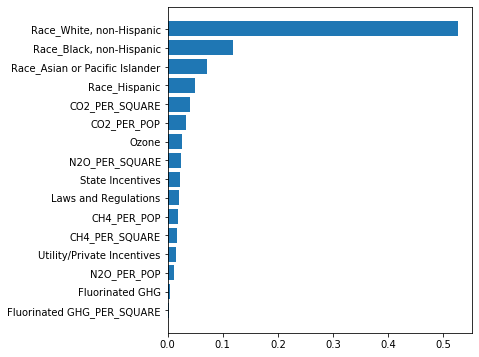

In [29]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data_q3_1.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()

### Gender

In [30]:
X = data_q3_2.values[:,1:].copy()
y = data_q3_2.DataValue.values

#### Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

nmc = 100

#Linear Regression
linreg = LinearRegression()
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
CVInfo = cross_validate(linreg, X, y, cv=cvf,return_train_score=True)
print('---- linear regression ----')
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

---- linear regression ----
0.5487172187887177
0.5116074339956539


#### Random forest regression

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#  Note:  no need for scaling, back to simple parameters
# set up dictionary for grid search
param_grid={'max_features':[5],'max_depth':[25],'n_estimators':[50]}
# set up cross-validation shuffles
cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
# set up search
grid_search=GridSearchCV(RandomForestRegressor(random_state=25),param_grid,cv=cvf,return_train_score=True)
# implement search
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)

print('---- random forest ----')
print(results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']])
print('---- optimal parameters ----')
print(grid_search.best_params_)
print('---- best accuracy ----')
print(grid_search.best_score_)

---- random forest ----
   rank_test_score  mean_test_score param_max_features param_max_depth
0                1         0.898508                  5              25
---- optimal parameters ----
{'max_depth': 25, 'max_features': 5, 'n_estimators': 50}
---- best accuracy ----
0.8985082475763129


#### Gradient Boosting Regression

In [33]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split

nmc = 100

#Linear Regression
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)

cvf = ShuffleSplit(n_splits=nmc, test_size=0.2, random_state=25)
CVInfo = cross_validate(model, X, y, cv=cvf,return_train_score=True)
print('---- Gradient Boosting Regression ----')
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

---- Gradient Boosting Regression ----
0.9531774108977155
0.8728159185454067


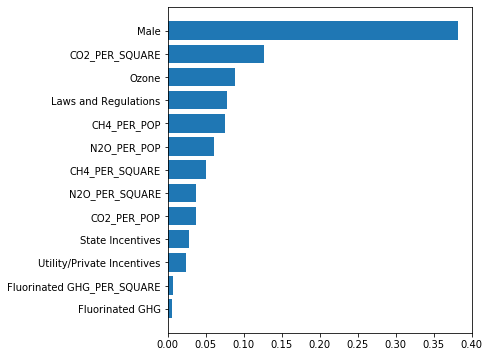

In [34]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data_q3_2.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()